In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
data_desc=open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")
# print(data_desc.read()) 
sample_subm=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


## 

In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

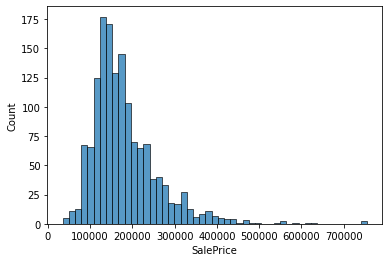

In [5]:
sns.histplot(train_data['SalePrice'])

<AxesSubplot:>

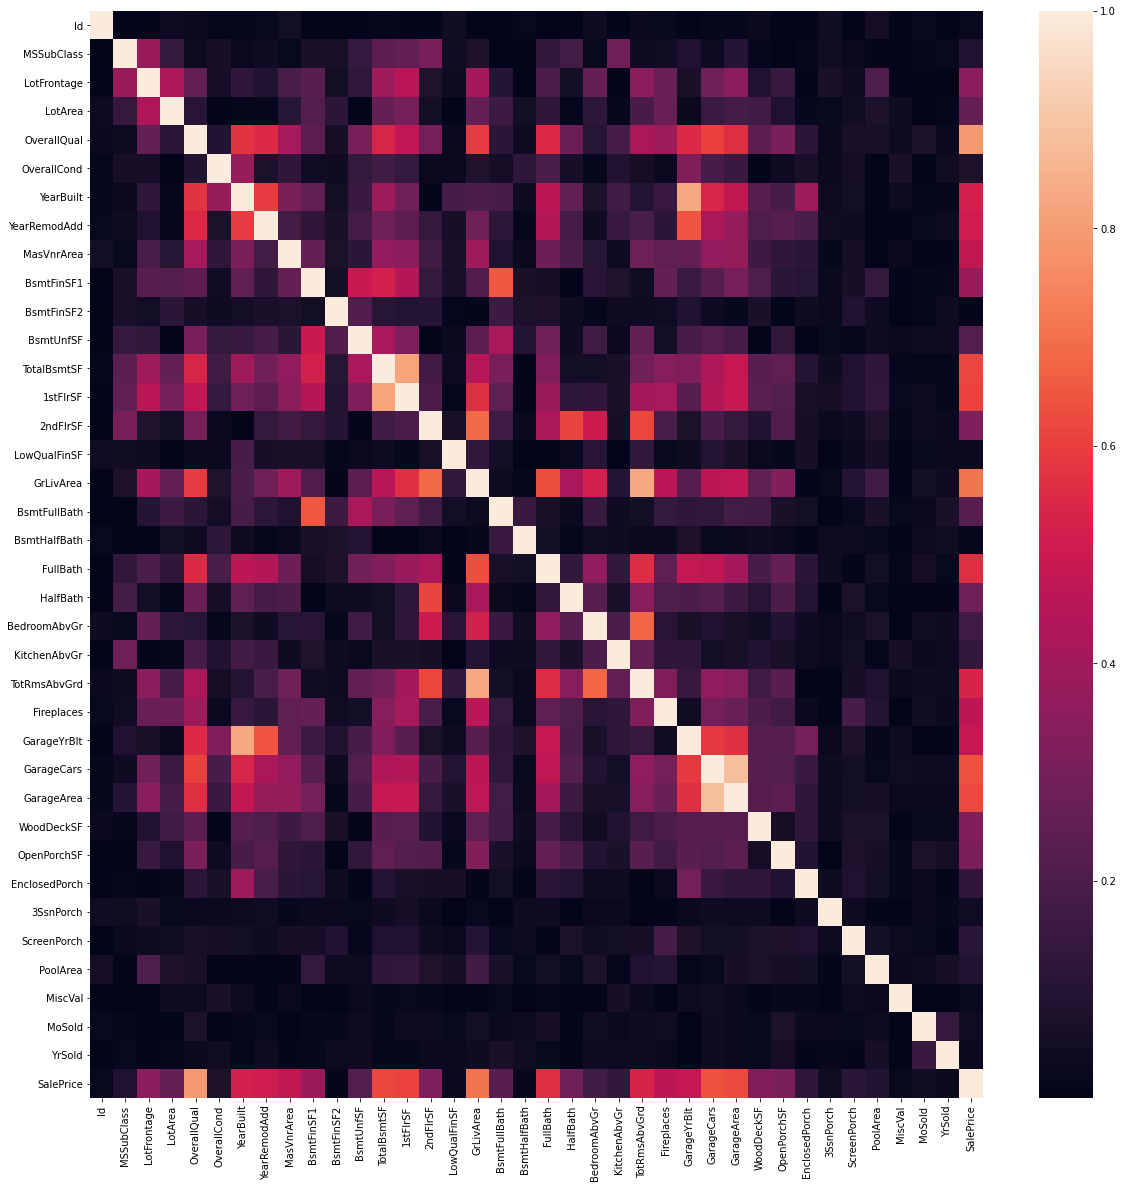

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr().abs())

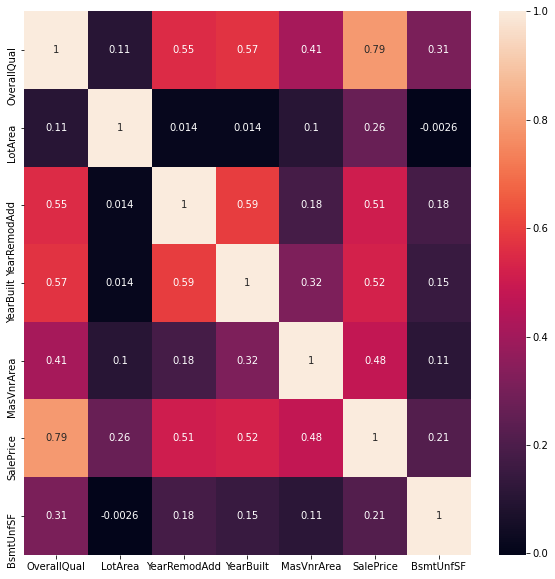

In [7]:
# plot only variables that are the most correlated with the sale price
corr=np.matrix(train_data.corr().abs())
high_corr=set()
high_corr.add('SalePrice')
n=len(corr)
for i in range(n):
    for j in range(n):
        if i==j:
            continue
        if corr[i,j]>0.5:
            high_corr.add(train_data.columns[i])
            high_corr.add(train_data.columns[j])

plt.figure(figsize=(10,10))
sns.heatmap(train_data[high_corr].corr(),annot=True)
plt.show()

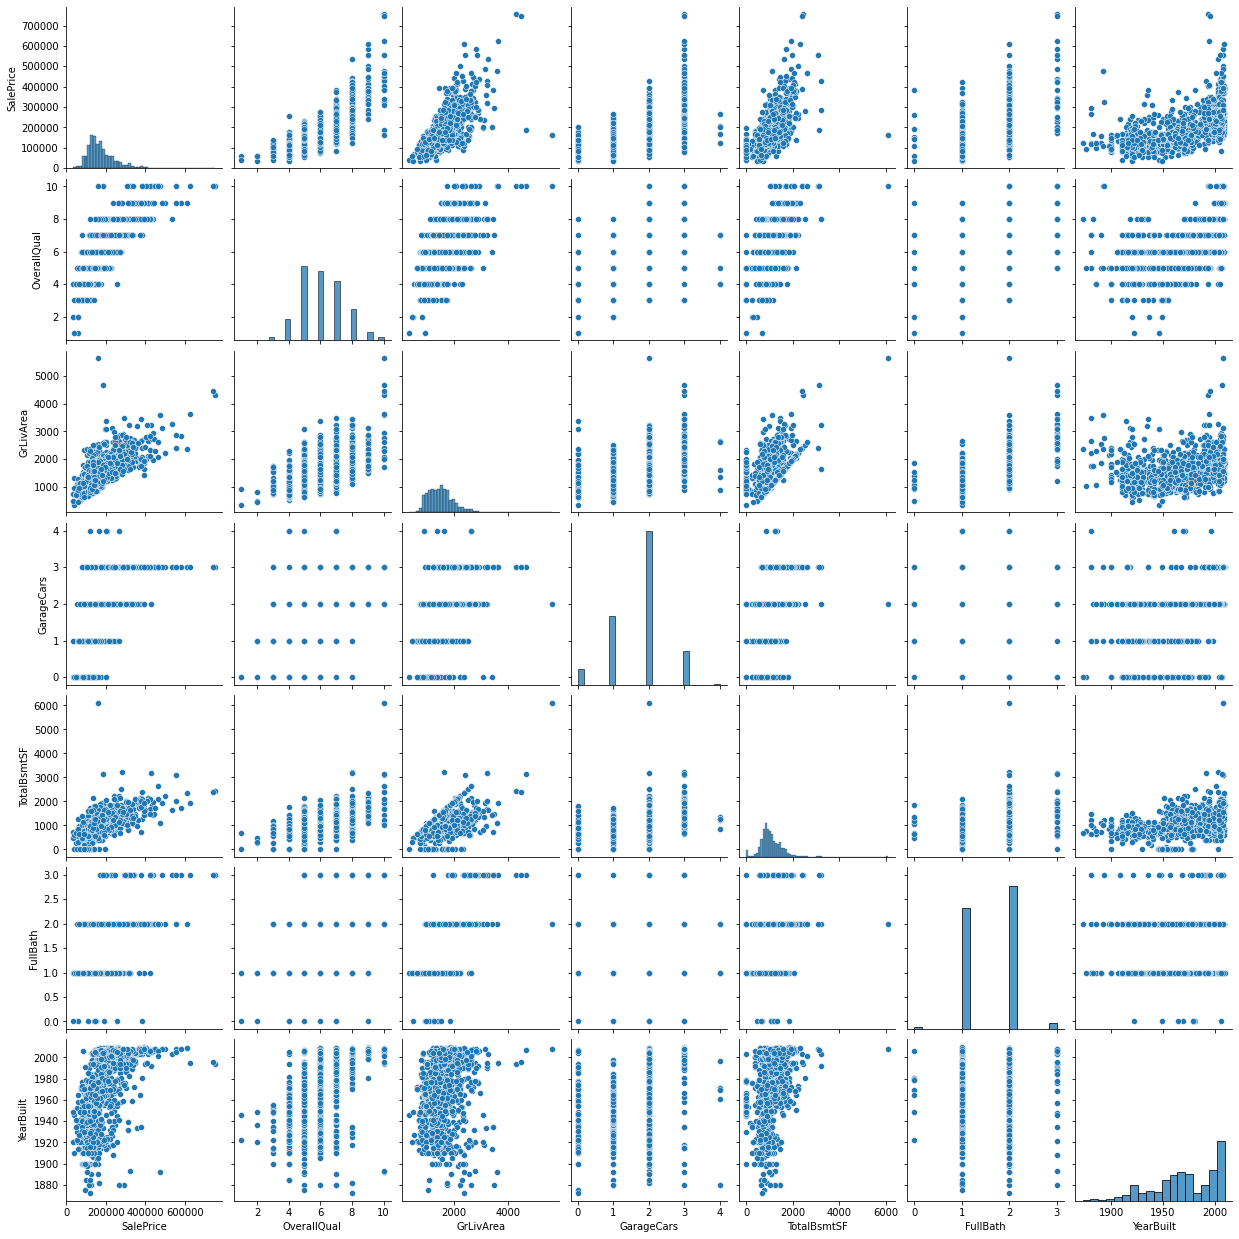

In [8]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols])

## Data preprocessing

In [9]:
all_data=pd.concat([train_data,test_data])

from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
EnclosedPorch     4.003891
ScreenPorch       3.946694
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
MSSubClass        1.375457
GrLivArea         1.269358
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64

In [10]:
for feature in high_skew.index:
    all_data[feature] = np.log1p(all_data[feature])

In [11]:
all_data_d = pd.get_dummies(all_data)
# creating matrices for sklearn:
# categorical to numerical data transformation
y_train = train_data['SalePrice']
x_train =all_data_d[:len(y_train)]
x_test = all_data_d[len(y_train):]
y_train = x_train['SalePrice']

all_data.head()
print(x_train.shape)
print(x_test.shape)

(1460, 290)
(1459, 290)


In [12]:
# missing data
total_missing = train_data.isnull().sum().sort_values(ascending=False)
percent_missing = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [13]:
# removing columns with a high % of missing data

#train_data = train_data.drop((missing_data[missing_data['Percent'] > 0.1]).index,1)
#test_data = test_data.drop((missing_data[missing_data['Percent'] > 0.1]).index,1)
train_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
test_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
# fill missing values with mean
col_name=train_data.isnull().sum().sort_values(ascending=False).index
train_data[col_name]=train_data[col_name].fillna(train_data[col_name].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


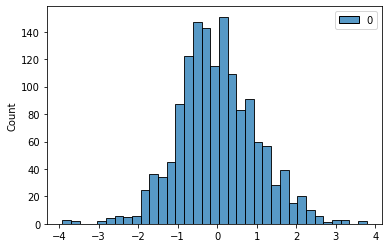

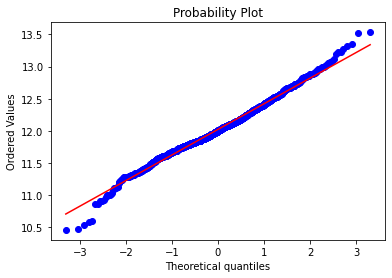

In [14]:
# Data standatization (mean=0; sd=1)
from sklearn.preprocessing import StandardScaler
log_price=np.log(1+train_data['SalePrice']) # positive skewnesss
saleprice_scaled = StandardScaler().fit_transform(log_price[:,np.newaxis]);
from scipy import stats
sns.histplot(saleprice_scaled)
plt.show()
res = stats.probplot(np.log(1+train_data['SalePrice']), plot=plt)
y_train=log_price

## Model training

In [15]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [16]:
import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
the_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
y_predict = np.exp(the_model.predict(x_test)-1)
y_predict

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([19813.64 , 20641.297, 21170.75 , ..., 21226.264, 19391.037,
       24246.45 ], dtype=float32)

In [18]:
sub = pd.DataFrame()
test_id = test_data['Id']
sub['Id'] = test_id
sub['SalePrice'] = y_predict

In [19]:
sub.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,21838.654297
std,421.321334,2763.489502
min,1461.000000,14335.875000
25%,1825.500000,19833.946289
50%,2190.000000,21014.052734
75%,2554.500000,23566.907227
max,2919.000000,30333.392578


In [20]:
sub.to_csv('mysubmission.csv',index=False)